<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0523_12%EC%9D%BC%EC%B0%A8_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EA%B8%B0%EC%B4%88_12(Decorator%5B%EC%99%B8%EB%B6%80%ED%95%A8%EC%88%98%2C_%EB%82%B4%EB%B6%80%ED%95%A8%EC%88%98%5D%2Csymbol_table%2C%EC%A0%95%EC%A0%81%EB%A9%94%EC%86%8C%EB%93%9C%2C%ED%81%B4%EB%9E%98%EC%8A%A4%EB%A9%94%EC%84%9C%EB%93%9C%2C%EC%BA%A1%EC%8A%90%ED%99%94%2Cstack).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decorator**

In [ ]:
def quadratic(a,b,c):
    # this is the outer enclosing function
    cache = {}
    def f(x):   #함수가 함수로 감싸져 있음
        #this is the nested function
        if x in cache:
            return cache[x]
        y = a*x*x + b*x + c     #f()는 abc를 받지 X
        cache[x]=y
        return y
    return f # returns the nested function  반환하는 것이 내부 함수임

1. 외부함수가 내부함수를 감싸고 있습니다.
2. 내부함수가 외부함수의 변수를 끌어다 씁니다.
3. 외부함수는 내부함수를 반환(return)합니다.

이 3가지 조건이 충족되면 함수closer입니다.

In [ ]:
f1 = quadratic(1,2,1)

In [ ]:
f1 #y = 1*x*x + 2*x + 1

<function __main__.quadratic.<locals>.f>

In [ ]:
f1(1)#<=== 얘가 x

4

In [ ]:
f2 = quadratic(1,6,9)

In [ ]:
f2  #y = 1*x*x + 6*x + 9

<function __main__.quadratic.<locals>.f>

In [ ]:
f2(1)

16

In [ ]:
f1(3)

16

**symbol tabel**

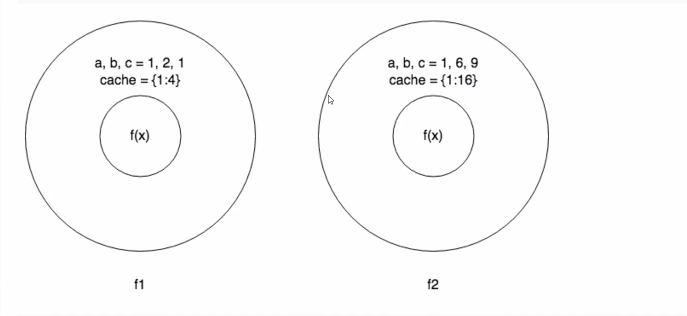

In [ ]:
def wrapper(func):
    def wrappend_func():
        print('====before====')
        func()
        print('====after====')
    return wrappend_func

In [ ]:
def myfunc():
    print('             I am here.')

In [ ]:
result = wrapper(myfunc)

In [ ]:
result # result = wrappend_func, func= myfunc

<function __main__.wrapper.<locals>.wrappend_func>

In [ ]:
result()

====before====
             I am here.
====after====


In [ ]:
result1 = wrapper(myfunc)
result1()

====before====
             I am here.
====after====


In [ ]:
@wrapper
def myfunc2():
    print('me too')

In [ ]:
myfunc2()

====before====
me too
====after====


In [ ]:
result2 = wrapper(myfunc2)
result2()

====before====
====before====
me too
====after====
====after====


In [ ]:
@wrapper
def test():
    print('아무거나')

In [ ]:
test()

====before====
아무거나
====after====


In [ ]:

def myfunc3():
    print('hello')

In [ ]:
result3 = wrapper(myfunc3)
result3()                                                       

====before====
hello
====after====


In [ ]:
import re
import time

In [ ]:
re.__dict__

In [ ]:
def outer(function):
    def inner(*args):
        start_time = time.time()
        function(*args)
        end_time = time.time()
        evaluation_time = (end_time - start_time)* 1000
        return evaluation_time
    return inner

In [ ]:
@outer
def iter_append(a_lists, n = 100000):
    for i in range(n):
        a_lists.append(i)
    return a_lists

In [ ]:
@outer
def  iter_extend(a_lists, n=100000):
    for i in range(n):
        a_lists.extend([i])
    return a_lists

In [ ]:
@outer
def or_extend(a_lists, n = 100000):
    dummy = list(range(2))
    a_lists.extend(dummy)
    return a_lists

In [ ]:
result1 = iter_append([21,22])
result2 = iter_extend([21,22])
result3 = or_extend([21,22])

In [ ]:
print(result1, result2, result3)

13.584613800048828 12.861967086791992 0.00667572021484375


# **정적 메서드와 클래스 메서드**


*   정적 메서드 : 인스턴스 객체 생성 없이 메서드 호출을 가능하게 해준다.
    
    (일반 메서드는 첫번째 인자로 인스턴스 객체를 반드시 전달해야한다.)
*   정적메서드는 인스턴스 객체와 상관이 없어 인스턴스 변수를 참조할 수 없다.
*   클래스 메서드 : 정적메서드와 같지만, 첫번째 인자로 클래스 객체가 전달되는 것이 다르다.



In [ ]:
class MyClass:
    def set(self, v):   #self는 무조건 instace만 들어간다.
        self.value = v
    def get(self):
        return self.value

MyClass.set('instance','egg')

In [ ]:
MC = MyClass()
MyClass.set(MC,'egg')

In [ ]:
MC.value

'egg'

In [ ]:
MC.get()

'egg'

In [ ]:
MC.set('dog')

In [ ]:
MC.value

'dog'

In [ ]:
class E:
    acc=0   #클래스 변수
    @staticmethod #정적메서드. 인스턴스 없이 메서드 사용하게 해줌, 인스턴스 변수를 사용할 수 없음
    def s_accumulate(v):
        E.acc +=v
        return E.acc
    @classmethod #정적메서드. 인스턴스 없이 메서드 사용하게 해줌. 클래스 변수를 사용할 수 있음
    def c_accumulate(cls,v):
        cls.acc += v
        return cls.acc

class F(E):
    acc =100

In [ ]:
a = F()

In [ ]:
print(a.acc, E.acc)

100 0


In [ ]:
print(a.s_accumulate(10), a.c_accumulate(10))

10 110


In [ ]:
E.s_accumulate(10)

10

In [ ]:
E.acc

10

In [ ]:
E.c_accumulate(20)

30

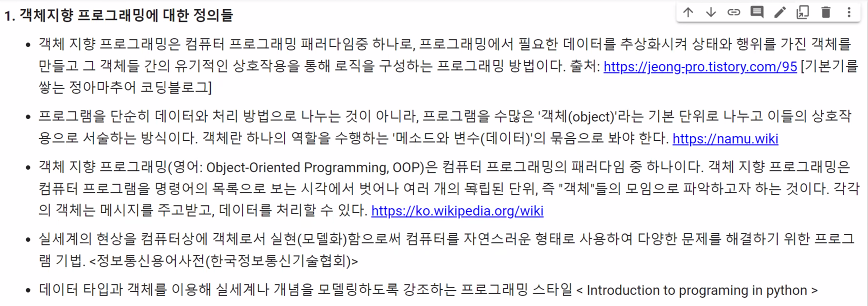

**2. 관련용어**

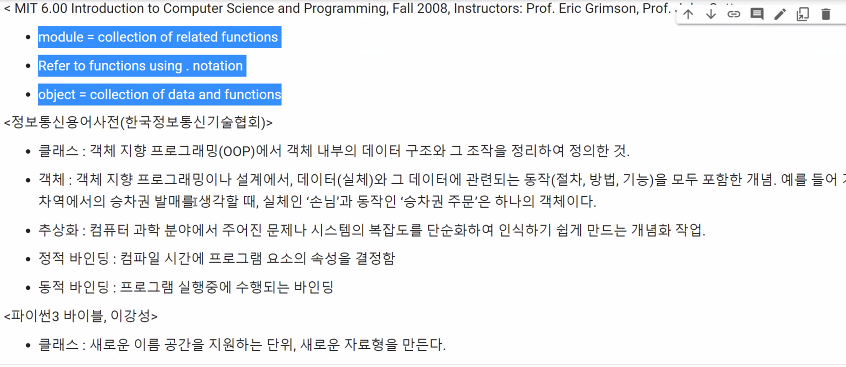

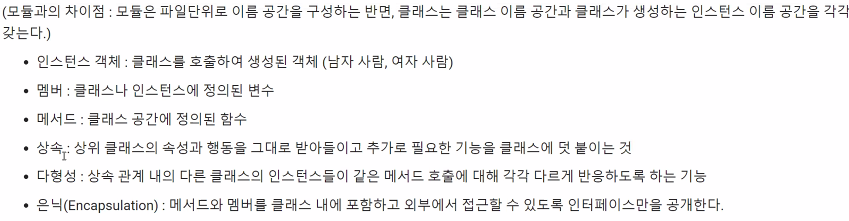

In [ ]:
class Country:
    '''super class'''
    name = '국가명'
    population = '인구'
    capital = '수도'

    def show(self):
        print('국가 클래스의 메소드 입니다.')

class Korea(Country):
    '''Sub class'''

    def __init__(self, name):
        self.name = name
    def show_name(self):
        print('국가 이름은 :' , self.name)


a= Korea('대한민국')
print(a.capital)
a.show()
a.show_name()

수도
국가 클래스의 메소드 입니다.
국가 이름은 : 대한민국


In [ ]:
class A(object):
    def saves(self):
        print('A saved')
class C(A):
    def saves(self):
        print('C saved')
        super().saves()

In [ ]:
c = C()

In [ ]:
c.saves()

C saved
A saved


In [ ]:
class Base:
    def f(self):
        self.g()
    def g(self):
        print('Base')

class Derived(Base):
    def g(self):
        print('Derived')

In [ ]:
d = Base()

In [ ]:
d.f()

Base


In [ ]:
d.f()

Base


In [ ]:
a = Derived()

In [ ]:
a.f()

Derived


In [ ]:
g= 1
type(g)

int

In [ ]:
g='test'
type(g)

str

In [ ]:
class MyClass:
    def __add__(self, x):
        print('add {} called', format(x))

In [ ]:
a = MyClass()

In [ ]:
a+3

add {} called 3


In [ ]:
1+1

2

In [ ]:
'te'+'st'

'test'

In [ ]:
h=100

In [ ]:
'{0}test'.format(h)

'100test'

In [ ]:
class Animal:
    def cry(self):
        print('...')
class Dog(Animal):
    def cry(self):
        print('멍멍')
class Duck(Animal):
    def cry(self):
        print('꽥꽥')
class Fish(Animal):
    pass

for each in (Dog(),Duck(), Fish()):
    each.cry()

멍멍
꽥꽥
...


- 캡슐화 (Encapulation) : 필요한 메서드와 멤버를 하나의 단위로 묶는것
- 파이썬에서는 공개방식의 캡슐화를 하며, 밑줄("__")을 사용하여 내부용이라는 것을 알려줄 뿐이다.
- 변수나 메서드 이름을 굳이 숨기고자 할 경우 __를 이름앞에 붙여주면 된다.

In [ ]:
class tests:
    def __init__(self, int_a):
        self.int_a = int_a

In [ ]:
tt = tests(10)

In [ ]:
tt.int_a =20

In [ ]:
tt.int_a

20

In [ ]:
class A:
    def __f(self):
        print('__f called')

In [ ]:
a =A()

In [ ]:
a.__f()

AttributeError: ignored

In [ ]:
dir(a)

['_A__f',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [ ]:
a._A__f()

__f called


In [ ]:
import numpy as np

#초기 데이터 : 각원소가 샘ㅍ흘
# (이 예에서 하나의 샘플이 하나의 문장 하지만 문서 전체가 될수 도 있음)

samples = ['The cat sat on the mat', 'The dog ate my homework.']

#데이터에 있는 모든 토큰의 인덱스를 구축합니다.
token_index ={}
for sample in samples:
    #split()메서드를 사용해 심플을 토큰으로 나누기
    #실전에서는 구둣점과 특수 문자도 사용한다
    for word in sample.split():
        if word not in token_index:
            #단어마다 고유한 인덱스를 할당
            token_index[word] = len(token_index)+1  #1부터 시작
            #인데스 0은 사용X

#샘플을 벡터로 변환
#각 샘플에서 max_length 까지 단어만 사용

max_length =10

#결과를 저장할 배열
results = np.zeros((len(samples), max_length, max(token_index.values()) +1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1.

In [ ]:
import numpy as np
a= np.zeros((3,2,4))  

In [ ]:
a

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [ ]:
s_dict = {1:100, 2:200}
len(s_dict)

2

In [ ]:
b =np.zeros((2,10,11))

In [ ]:
b

In [ ]:
s_dict.get()

In [ ]:
['The cat sat on the mat', 'The dog ate my homework.']

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
def quadratic(a,b,c):
    cache = {}
    def f(x):
        if x in cache:
            return cache[x]
        y = a*x*x + b*x + c 
        cache[x]=y
        return y
    return f

In [ ]:
f1 = quadratic(1,2,1)
print(f1(1))
f2 = quadratic(1,6,9)
f2(1)

4


16

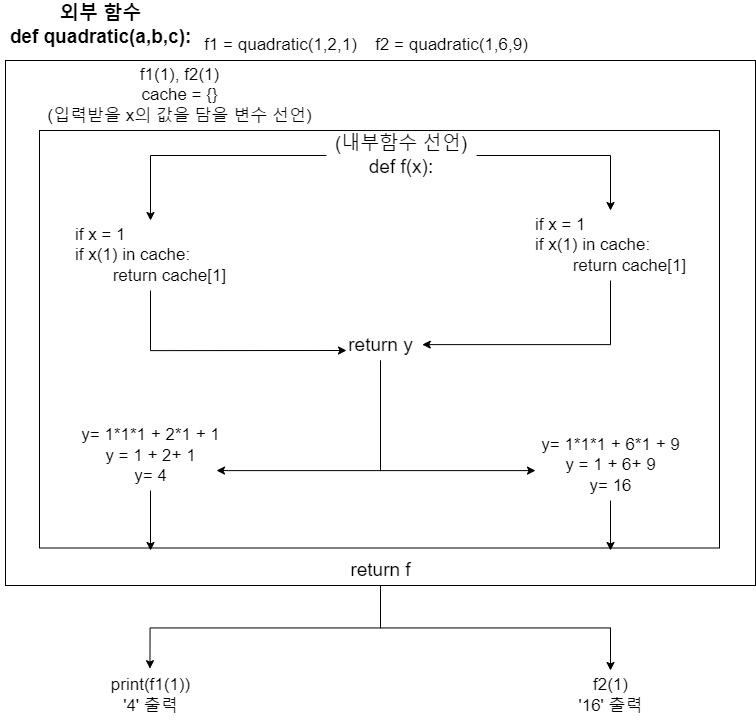

# stack 

In [ ]:
class Node: # Node 클래스  constructor 생성자 
    def __init__(self, item, link): # Node 생성자     
        self.item = item           
        self.next = link
                                
def push(item): # push 연산 #스택에 새로운 요소를 저장
    global top
    global size
    top = Node(item, top)  
    size += 1
    
def peek(): # peek 연산 #스택의 최상단요소를 출력
    if size != 0:
        return top.item 
              
def pop(): # pop 연산   #스택의 최상단 요소를 꺼내고 return
    global top
    global size
    if size != 0:
        top_item = top.item
        top = top.next
        size -= 1
        return top_item   
def print_stack(): # 스택 출력  
    print('top ->\t', end='')
    p = top
    while p:
        if p.next != None:
            print(p.item, '-> ', end='')
        else:
            print(p.item, end='')
        p = p.next
    print()


In [ ]:
top = None
size = 0

push('apple')
push('orange')
push('cherry')

print('사과, 오렌지, 체리, push 후:\t', end='')
print_stack()

print('top 항목: ' ,end='')
print(peek())

push('pear')
print('배 push 후:\t\t', end='')
print_stack()

pop()
push('grape')
print('pop(), 포도 push 후:\t', end='')
print_stack()

사과, 오렌지, 체리, push 후:	top ->	cherry -> orange -> apple
top 항목: cherry
배 push 후:		top ->	pear -> cherry -> orange -> apple
pop(), 포도 push 후:	top ->	grape -> cherry -> orange -> apple


In [ ]:
class Node:				                    
    def __init__ (self, elem, link=None):	
        self.data = elem 			        
        self.link = link			        

class LinkedStack :
    def __init__( self ):	
        self.top = None	    

    def isEmpty( self ): return self.top == None
    def clear( self ): self.top = None		    
    def push( self, item ):	                	
        n = Node(item, self.top)	        	
        self.top = n			

    def pop( self ):			
        if not self.isEmpty():	
            n = self.top		
            self.top = n.link	
            return n.data		

    def peek( self ):			
        if not self.isEmpty():	
            return self.top.data


    def size( self ):			
        node = self.top			
        count = 0
        while not node == None :
            node = node.link	
            count += 1			
        return count
def display( self, msg='LinkedStack:'): 
        print(msg, end='')		
        node = self.top			
        while not node == None :	 	
            print(node.data, end=' ')	
            node = node.link		    
        print()
